<a href="https://colab.research.google.com/github/Chi68P1/AI/blob/main/BT_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e634ce4c170d8976b89f9510a8932291d5d37a5657e682aacf76b152e20ecf7e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

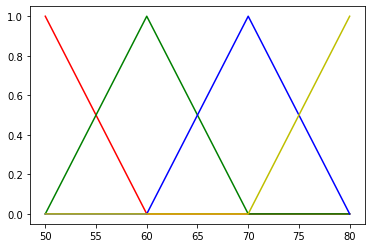

In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt

x = np.arange(50,81,1) # phạm vi trục x
slow = fuzzy.trimf(x,[50,50,60])  #tọa độ các điểm chiếu xuống trục x của các đỉnh
modium = fuzzy.trimf(x,[50,60,70])
modium_fast=fuzzy.trimf(x,[60,70,80])
full_speed=fuzzy.trimf(x,[70,80,80])

#gaussmf(x,a,b) a là tâm, b là bề rộng
#trapmf(x,[a,b,c,d]) #tọa độ các điểm chiếu xuống trục x của các đỉnh

plt.figure()
#tam giác
plt.plot(x,slow,'r',linewidth = 1.5,label = 'slow')
plt.plot(x,modium,'g',linewidth = 1.5,label = 'modium')
plt.plot(x,modium_fast,'b',linewidth = 1.5,label = 'modium_fast')
plt.plot(x,full_speed,'y',linewidth = 1.5,label = 'full_speed')
plt.plot



19.889730639730647


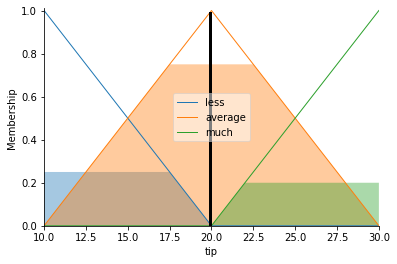

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food') #input
service = ctrl.Antecedent(np.arange(0,11,1),'service')

tip = ctrl.Consequent(np.arange(10,31,1),'tip') #output

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,6])
service['average'] = fuzz.trimf(service.universe,[0,6,10])
service['good'] = fuzz.trimf(service.universe,[6,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['average'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

# Rule
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['less'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['less'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['average'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

# Learn
tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6
tipping.input['service']=9

tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

#food.view()
#service.view()
#tip['less'].view() # in đậm
#rule1.view()
#rule2.view()
#rule3.view()
#rule4.view()
#rule5.view()
#rule6.view()
#rule7.view()
#rule8.view()
#rule9.view()



In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')


quality.automf(3)
service.automf(3)

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])


tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8


tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

20.50208669946587


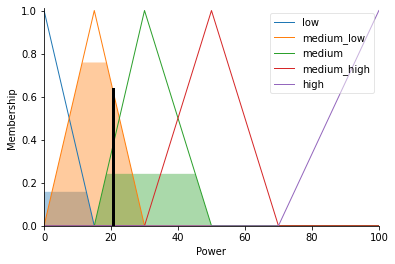

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Time = ctrl.Antecedent(np.arange(10, 301, 1), 'Time')
Rice = ctrl.Antecedent(np.arange(100, 2001, 1), 'Rice')
Power = ctrl.Consequent(np.arange(0, 101, 1), 'Power')

Time.automf(5)
Rice.automf(5)

Power['low'] = fuzz.trimf(Power.universe, [0, 0, 15])
Power['medium_low'] = fuzz.trimf(Power.universe, [0, 15, 30])
Power['medium'] = fuzz.trimf(Power.universe, [15, 30, 50])
Power['medium_high'] = fuzz.trimf(Power.universe, [30, 50, 70])
Power['high'] = fuzz.trimf(Power.universe, [70, 100, 100])

rule1 = ctrl.Rule(Time['poor'] & Rice['poor'], Power['low'])
rule2 = ctrl.Rule(Time['poor'] & Rice['mediocre'], Power['low'])
rule3 = ctrl.Rule(Time['poor'] & Rice['average'], Power['low'])
rule4 = ctrl.Rule(Time['poor'] & Rice['decent'], Power['medium_low'])
rule5 = ctrl.Rule(Time['poor'] & Rice['good'], Power['medium_low'])

rule6 = ctrl.Rule(Time['mediocre'] & Rice['poor'], Power['low'])
rule7 = ctrl.Rule(Time['mediocre'] & Rice['mediocre'], Power['medium_low'])
rule8 = ctrl.Rule(Time['mediocre'] & Rice['average'], Power['medium_low'])
rule9 = ctrl.Rule(Time['mediocre'] & Rice['decent'], Power['medium'])
rule10 = ctrl.Rule(Time['mediocre'] & Rice['good'], Power['medium'])

rule11 = ctrl.Rule(Time['average'] & Rice['poor'], Power['medium_low'])
rule12 = ctrl.Rule(Time['average'] & Rice['mediocre'], Power['medium'])
rule13 = ctrl.Rule(Time['average'] & Rice['average'], Power['medium'])
rule14 = ctrl.Rule(Time['average'] & Rice['decent'], Power['medium_high'])
rule15 = ctrl.Rule(Time['average'] & Rice['good'], Power['high'])

rule16 = ctrl.Rule(Time['decent'] & Rice['poor'], Power['medium_low'])
rule17 = ctrl.Rule(Time['decent'] & Rice['mediocre'], Power['medium'])
rule18 = ctrl.Rule(Time['decent'] & Rice['average'], Power['medium_high'])
rule19 = ctrl.Rule(Time['decent'] & Rice['decent'], Power['medium_high'])
rule20 = ctrl.Rule(Time['decent'] & Rice['good'], Power['high'])

rule21 = ctrl.Rule(Time['good'] & Rice['poor'], Power['medium'])
rule22 = ctrl.Rule(Time['good'] & Rice['mediocre'], Power['medium_high'])
rule23 = ctrl.Rule(Time['good'] & Rice['average'], Power['medium_high'])
rule24 = ctrl.Rule(Time['good'] & Rice['decent'], Power['high'])
rule25 = ctrl.Rule(Time['good'] & Rice['good'], Power['high'])

Power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
Powering = ctrl.ControlSystemSimulation(Power_ctrl)

Powering.input['Time'] = 100 # 10 min -300 min
Powering.input['Rice'] = 500 # 100 g - 2000 g

Powering.compute()
print(Powering.output['Power'])
Power.view(sim=Powering)